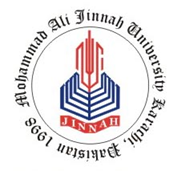
# Indoor User Movement Prediction
## Riaz Ahmed
#### FA17-PHCS-0008
##### January 3, 2019

# Abstract
This dataset contains temporal data from a Wireless Sensor Network deployed in real-world office environments. The task is intended as real-life benchmark in the area of Ambient Assisted Living.The binary classification task consists in predicting the pattern of user movements in real-world office environments from time-series generated by a Wireless Sensor Network (WSN).

# Introduction
This dataset represents a real-life benchmark in the area of Ambient Assisted Living applications, as described in [1].
The binary classification task consists in predicting the pattern of user movements in real-world office environments from time-series generated by a Wireless Sensor Network (WSN).
Input data contains temporal streams of radio signal strength (RSS) measured between the nodes of a WSN, comprising 5 sensors: 4 anchors deployed in the environment and 1 mote worn by the user. Data has been collected during user movements at the frequency of 8 Hz (8 samples per second). In the provided dataset, the RSS signals have been rescaled to the interval [-1,1], singly on the set of traces collected from each anchor (as in [1]).
Target data consists in a class label indicating whether the user's trajectory will lead to a change in the spatial context (i.e. a room change) or not. In particular, the target class +1 is associated to the location changing movements, while the target class -1 is associated to the location preserving movements.
The measurement campaign involved a number of 3 different environmental settings, each of which comprises 2 rooms (containing typical office furniture) separated by a corridor. A sketch of the common setup considered is provided in the attached Figure. In each environmental setting, the anchors are deployed in fixed positions near the rooms corners (at the height of 1.5 m from the ground), while the mobile is worn on the chest of the user. The Figure also shows a simplified illustration of the types of user trajectories considered, with straight paths yielding to a spatial context change and curved ones leading to spatial context preservation. Each path produces a trace of RSS measurements from the beginning of the trajectory until a marker point, which is denoted as M in the Figure. The marker M is the same for all the movements, therefore different paths cannot be distinguished based only on the RSS values collected at M.

Each input file in the provided dataset contains data pertaining to one temporal sequence of input RSS data (1 user trajectory for each file). The dataset contains 314 sequences, for a total number of 13197 steps.

Further information can be found at the webpage: [Web Link].

A complete description of this dataset can be found in [1], which also provides details on the performance achieved by Echo State Networks on the corresponding classification task. 


# Source
Indoor User Movement Prediction from RSS data Data Set.

https://archive.ics.uci.edu/ml/datasets/Indoor+User+Movement+Prediction+from+RSS+data

## Data Set Characteristics
Multivariate, Sequential, Time-Series

### Attribute Characteristics
Real

### Associated Tasks
Classification

### Number of Instances
13197

### Number of Attributes
4

### Area
Computer

### Attribute Information:
Data is provided in comma separated value (csv) format.

#### - Input data
Input RSS streams are provided in files named MovementAAL_RSS_SEQID.csv, where IDSEQ is the progressive numeric sequence ID.
In each file, each row corresponds to a time step measurement (in temporal order) and contains the following information:
RSS_anchor1, RSS_anchor2, RSS_anchor3, RSS_anchor4

#### - Target data
Target data is provided in the file MovementAAL_target.csv
Each row in this file contains:
sequence_ID, class_label
 
#### - Dataset grouping
Data is grouped in 3 sets, as described in [1].
File MovementAAL_DatasetGroup.csv, provides information about such data grouping.
Each row in this file contains:
sequence_ID, dataset_ID

#### - Path grouping
Users' movements are divided in 6 prototypical paths, as described in [1].
File MovementAAL_Paths.csv provides information about data grouping based on path type.
Each row in this file contains:
sequence_ID, path_ID


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import moment
from scipy.stats import kurtosis
from scipy.stats import skew  
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 99999
data = pd.read_csv(
    filepath_or_buffer='C:\MyWork\PHD\Machine Learning\Project\MovementAAL\MovementAAL_CSV.csv', 
    header=None, 
    sep=',')
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
data.V1 = data.V1.astype(str)
data

V1        V2        V3        V4        V5   V6  V7  V8  V9
0          1 -0.904760 -0.480000  0.285710  0.300000    1   1   1   1
1          2 -0.571430 -0.320000  0.142860  0.300000    1   1   1   1
2          3 -0.380950 -0.280000 -0.142860  0.350000    1   1   1   1
3          4 -0.285710 -0.200000 -0.476190  0.350000    1   1   1   1
4          5 -0.142860 -0.200000  0.142860 -0.200000    1   1   1   1
5          6 -0.142860 -0.200000  0.047619  0.000000    1   1   1   1
6          7 -0.142860 -0.160000 -0.380950  0.200000    1   1   1   1
7          8 -0.142860 -0.040000 -0.619050 -0.200000    1   1   1   1
8          9 -0.095238 -0.080000  0.142860 -0.550000    1   1   1   1
9         10 -0.047619  0.040000 -0.095238  0.050000    1   1   1   1
10        11 -0.190480 -0.040000  0.095238  0.400000    1   1   1   1
11        12 -0.095238 -0.040000 -0.142860  0.350000    1   1   1   1
12        13 -0.333330 -0.080000 -0.285710 -0.200000    1   1   1   1
13        14 -0.238100  0.040000  0.142860  0.350000    1   1   1   1
14        15  0.000000  0.080000  0.142860  0.050000    1   1   1   1
15        16 -0.095238  0.040000  0.095238  0.100000    1   1   1   1
16        17 -0.142860 -0.200000  0.142860  0.500000    1   1   1   1
17        18 -0.190480  0.040000 -0.428570  0.300000    1   1   1   1
18        19 -0.142860 -0.080000 -0.238100  0.150000    1   1   1   1
19        20 -0.333330  0.160000 -0.142860 -0.800000    1   1   1   1
20        21 -0.428570  0.160000 -0.285710 -0.100000    1   1   1   1
21        22 -0.714290  0.160000 -0.285710  0.200000    1   1   1   1
22        23 -0.095238 -0.080000  0.095238  0.350000    1   1   1   1
23        24 -0.285710  0.040000  0.142860  0.200000    1   1   1   1
24        25  0.000000  0.040000  0.142860  0.100000    1   1   1   1
25        26  0.000000  0.040000 -0.047619 -0.050000    1   1   1   1
26        27 -0.142860 -0.600000 -0.285710 -0.100000    1   1   1   1
27        28 -0.571430 -0.200000  0.714290  0.500000    2   1   1   1
28        29 -0.761900 -0.480000  0.761900 -0.250000    2   1   1   1
29        30 -0.857140 -0.600000  0.857140  0.550000    2   1   1   1
30        31 -0.761900 -0.400000  0.714290  0.600000    2   1   1   1
31        32 -0.761900 -0.840000  0.857140  0.450000    2   1   1   1
32        33 -0.761900 -0.840000  0.714290  0.050000    2   1   1   1
33        34 -0.809520 -0.880000  0.761900  0.650000    2   1   1   1
34        35 -0.809520 -0.880000  0.714290  0.650000    2   1   1   1
35        36 -0.666670 -0.520000  0.761900  0.650000    2   1   1   1
36        37 -0.666670 -0.520000  0.761900  0.650000    2   1   1   1
37        38 -0.619050 -0.400000  0.380950  0.650000    2   1   1   1
38        39 -0.809520 -0.320000  0.142860  0.800000    2   1   1   1
39        40 -0.809520 -0.480000  0.285710  0.800000    2   1   1   1
40        41 -0.761900 -0.600000  0.000000  0.800000    2   1   1   1
41        42 -0.523810 -0.640000 -0.142860  0.650000    2   1   1   1
42        43 -0.333330 -0.360000  0.047619  0.650000    2   1   1   1
43        44 -0.285710 -0.200000 -0.095238  0.550000    2   1   1   1
44        45 -0.285710 -0.080000 -0.428570  0.350000    2   1   1   1
45        46 -0.285710 -0.080000  0.047619  0.400000    2   1   1   1
46        47 -0.333330 -0.160000  0.142860 -0.050000    2   1   1   1
47        48 -0.285710 -0.640000  0.000000  0.350000    2   1   1   1
48        49 -0.190480 -0.520000  0.000000  0.050000    2   1   1   1
49        50 -0.190480 -0.200000  0.190480  0.250000    2   1   1   1
50        51 -0.190480 -0.080000 -0.333330 -0.100000    2   1   1   1
51        52 -0.333330  0.040000  0.095238 -0.100000    2   1   1   1
52        53 -0.142860  0.040000  0.142860  0.050000    2   1   1   1
53        54 -1.000000 -0.120000  0.571430  0.650000    3   1   1   1
54        55 -0.333330 -0.080000  0.666670  0.650000    3   1   1   1
55        56 -0.761900 -0.840000  0.761900  0.500000    3   1   1   1
56        57 -0.8095

In [2]:
stats = pd.DataFrame(columns=['MOMENT1','MOMENT2','MOMENT3','MOMENT4','MEAN1','MEAN2','MEAN3','MEAN4','VAR1','VAR2','VAR3','VAR4','SKEW1','SKEW2','SKEW3','SKEW4','KURT1','KURT2','KURT3','KURT4','T'])
moments = pd.DataFrame(columns=['MOMENT1','MOMENT2','MOMENT3','MOMENT4'])
means = pd.DataFrame(columns=['MEAN1','MEAN2','MEAN3','MEAN4','T'])
variances = pd.DataFrame(columns=['VAR1','VAR2','VAR3','VAR4'])
skewness = pd.DataFrame(columns=['SKEW1','SKEW2','SKEW3','SKEW4'])
kurtosis = pd.DataFrame(columns=['KURT1','KURT2','KURT3','KURT4'])
target = pd.DataFrame(columns=['T'])
tg=np.zeros((314))
l=0
for i in range(1,315):
    d=data.loc[data['V6'] == i]
    l += len(d['V9'])
    t = d['V9'][l-1]
    kr1 = d['V2'].var()
    kr2 = d['V3'].var()
    kr3 = d['V4'].var()
    kr4 = d['V5'].var()
    sk1 = d['V2'].var()
    sk2 = d['V3'].var()
    sk3 = d['V4'].var()
    sk4 = d['V5'].var()
    var1 = d['V2'].var()
    var2 = d['V3'].var()
    var3 = d['V4'].var()
    var4 = d['V5'].var()
    mean1 = d['V2'].mean()
    mean2 = d['V3'].mean()
    mean3 = d['V4'].mean()
    mean4 = d['V5'].mean()
    moment1 = moment(d['V2'], moment=2)
    moment2 = moment(d['V3'], moment=2)
    moment3 = moment(d['V4'], moment=2)
    moment4 = moment(d['V5'], moment=2)
    stats = stats.append({'MOMENT1':moment1,'MOMENT2':moment2,'MOMENT3':moment3,'MOMENT4':moment4,'MEAN1':mean1,'MEAN2':mean2,'MEAN3':mean3,'MEAN4':mean4,'VAR1':var1,'VAR2':var2,'VAR3':var3,'VAR4':var4,'SKEW1':sk1,'SKEW2':sk2,'SKEW3':sk3,'SKEW4':sk4,'KURT1':kr1,'KURT2':kr2,'KURT3':kr3,'KURT4':kr4,'T':t},ignore_index=True)
    moments = moments.append({'MOMENT1':moment1,'MOMENT2':moment2,'MOMENT3':moment3,'MOMENT4':moment4},ignore_index=True)
    means = means.append({'MEAN1':mean1,'MEAN2':mean2,'MEAN3':mean3,'MEAN4':mean4,'T':t},ignore_index=True)
    variances = variances.append({'VAR1':var1,'VAR2':var2,'VAR3':var3,'VAR4':var4},ignore_index=True)
    skewness = skewness.append({'SKEW1':sk1,'SKEW2':sk2,'SKEW3':sk3,'SKEW4':sk4},ignore_index=True)
    kurtosis = kurtosis.append({'KURT1':kr1,'KURT2':kr2,'KURT3':kr3,'KURT4':kr4},ignore_index=True)
    target = target.append({'T':t},ignore_index=True)
    tg[i-1]=t
target['T'] = target['T'].apply(np.int64)
#moments['T'] = moments['T'].apply(np.int64)
means['T'] = means['T'].apply(np.int64)
#variances['T'] = variances['T'].apply(np.int64)
#skewness['T'] = skewness['T'].apply(np.int64)
#kurtosis['T'] = kurtosis['T'].apply(np.int64)
np.savetxt('means.txt',means,delimiter=',',fmt='%s')
means

MEAN1     MEAN2         MEAN3     MEAN4  T
0   -0.232805 -0.082963 -7.760052e-02  0.088889  1
1   -0.531134 -0.416923  3.113553e-01  0.407692  1
2   -0.662525 -0.328696  4.886127e-01  0.452174  1
3   -0.720497 -0.443478  5.465843e-01  0.436957  1
4   -0.803810 -0.496000  6.209520e-01  0.514000  1
5   -0.779540 -0.440000  5.731930e-01  0.492593  1
6   -0.734432 -0.466154  5.970685e-01  0.476923  1
7   -0.659341 -0.443077  5.695958e-01  0.392308  1
8   -0.706666 -0.467200  3.466665e-01  0.446000  1
9   -0.066666 -0.136000 -1.409526e-01  0.066000  1
10  -0.208334 -0.135000 -1.706340e-01  0.068750  1
11  -0.168652 -0.138333 -5.952296e-02  0.081250  1
12  -0.208333 -0.166667 -1.924604e-01  0.081250  1
13  -0.209109 -0.201739 -4.140826e-02  0.108696  1
14  -0.492673 -0.309231  2.454211e-01  0.280769  1
15  -0.587302 -0.376667  3.412694e-01  0.379167  1
16  -0.639195 -0.455385  3.131869e-01  0.405769  1
17  -0.641904 -0.400000  4.723804e-01  0.418000  1
18  -0.831502 -0.421538  6.098896e-01  0.467308  1
19  -0.793650 -0.465000  6.646833e-01  0.391667  1
20  -0.745422 -0.444615  4.688642e-01  0.394231  1
21  -0.753622 -0.469565  5.445139e-01  0.417391  1
22  -0.266314 -0.186667 -2.486763e-01  0.061111  1
23  -0.671769 -0.440000  4.268709e-01  0.442857  1
24  -0.339286 -0.218333  6.349250e-02  0.197917  1
25  -0.481685 -0.266154  1.849818e-01  0.276923  1
26  -0.538588 -0.060690 -6.568114e-02  0.062069  0
27  -0.697866 -0.220690 -1.362890e-01  0.224138  0
28  -0.689524 -0.286400  1.905280e-03  0.162000  0
29  -0.763492 -0.326667 -8.730187e-02  0.245000  0
30  -0.735449 -0.380741 -2.821781e-02  0.140741  0
31  -0.742201 -0.331034  1.477872e-02  0.294828  0
32  -0.817806 -0.469565 -4.968839e-02  0.217391  0
33  -0.756191 -0.364800 -1.695235e-01  0.170000  0
34  -0.844796 -0.401481 -1.940033e-02  0.250000  0
35  -0.783882 -0.403077  1.648377e-02  0.251923  0
36  -0.857142 -0.429231  2.380954e-02  0.290385  0
37  -0.556776 -0.061538  2.014654e-02  0.048077  0
38  -0.837438 -0.453793 -2.955721e-02  0.248276  0
39  -0.805997 -0.481481  9.347367e-02  0.288889  0
40  -0.823633 -0.377778  7.054704e-02  0.288889  0
41  -0.882784 -0.427692  4.761831e-02  0.276923  0
42  -0.807760 -0.472593  1.446214e-01  0.414815  0
43  -0.789115 -0.488571  1.462585e-01  0.375000  0
44  -0.794643 -0.463750  2.380944e-01  0.523438  0
45  -0.613332 -0.091200 -1.485718e-01  0.014000  0
46  -0.527472 -0.087692 -1.483510e-01  0.036538  0
47  -0.600615 -0.078710 -1.336405e-01  0.072581  0
48  -0.657510 -0.156923 -1.300368e-01  0.155769  0
49  -0.717569 -0.215172 -8.867010e-02  0.100000  0
50  -0.691357 -0.192593 -1.922389e-01  0.103704  0
51  -0.675824 -0.189231 -4.761769e-02  0.140385  0
52   0.153967  0.141333 -3.714283e-01 -0.218333  0
53   0.292516  0.102857 -5.124710e-01 -0.321429  0
54   0.190476  0.404000 -5.428560e-01 -0.500000  0
55   0.397515  0.445217 -5.610757e-01 -0.552174  0
56   0.321429  0.486000 -5.499995e-01 -0.462500  0
57   0.340475  0.620000 -6.404765e-01 -0.565000  0
58   0.380951  0.653913 -6.418213e-01 -0.608696  0
59   0.378968  0.701667 -6.964292e-01 -0.664583  0
60   0.497619  0.844000 -7.380955e-01 -0.807500  0
61   0.208111  0.201481 -3.880065e-01 -0.275926  0
62   0.265010  0.106087 -4.596274e-01 -0.326087  0
63   0.133786  0.139048 -4.965981e-01 -0.235714  0
64   0.251082  0.201818 -4.199118e-01 -0.270455  0
65   0.184761  0.198400 -4.990462e-01 -0.592000  1
66   0.472050  0.309565 -5.921335e-01 -0.702174  1
67   0.444444  0.308148 -6.296293e-01 -0.707407  1
68   0.448053  0.510909 -7.532468e-01 -0.768182  1
69   0.452382  0.686667 -7.043650e-01 -0.750000  1
70   0.136905  0.001667 -3.273801e-01 -0.277083  1
71   0.519842  0.596667 -7.519837e-01 -0.762500  1
72   0.488536  0.641481 -7.654319e-01 -0.703704  1
73   0.506667  0.488000 -7.695236e-01 -0.708000  1
74   0.437075  0.411429 -6.513607e-01 -0.700000  1
75   0.022774  0.043478 -3.436847e-01 -0.236957  1
76   0.146825 -0.018333 -4.087300e-01 -0.343750  1
77   0.173913 -0.008696 -4.865

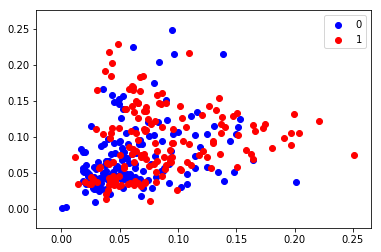

In [4]:
Xm = moments.as_matrix()
X = Xm[:, :4]
y = tg
plt.figure(figsize=(10, 6))
fig = plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();
fig.savefig('RIAZ AHMED PHD(CS) - moments.jpeg') 

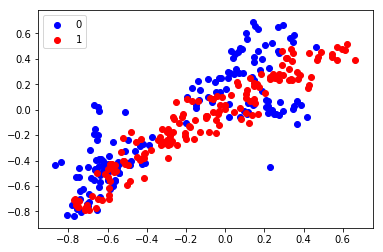

In [5]:
Xm = means.as_matrix()
X = Xm[:, 2:4]
y = tg
plt.figure(figsize=(10, 6))
fig = plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();
fig.savefig('RIAZ AHMED PHD(CS) - means.jpeg') 

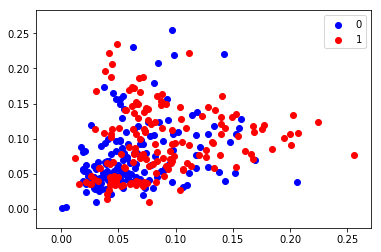

In [8]:
Xm = variances.as_matrix()
X = Xm[:, :4]
y = tg
plt.figure(figsize=(10, 6))
fig = plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();
fig.savefig('RIAZ AHMED PHD(CS) - variances.jpeg') 

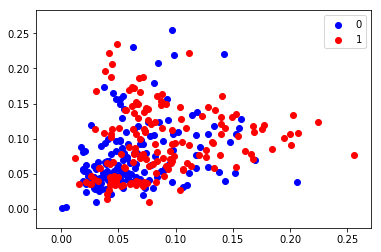

In [9]:
Xm = skewness.as_matrix()
X = Xm[:, :4]
y = tg
plt.figure(figsize=(10, 6))
fig = plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();
fig.savefig('RIAZ AHMED PHD(CS) - skewness.jpeg') 

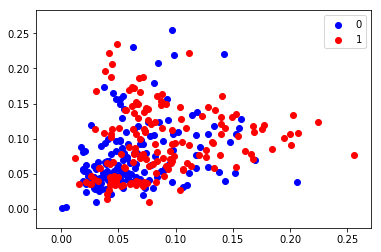

In [11]:
Xm = kurtosis.as_matrix()
X = Xm[:, :4]
y = tg
plt.figure(figsize=(10, 6))
fig = plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();
fig.savefig('RIAZ AHMED PHD(CS) - kurtosis.jpeg') 

In [12]:
Xm = means.as_matrix()
#X = Xm[:, 2:4]
X = Xm[:, 2:4]
y = tg

In [13]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [14]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [15]:
%time model.fit(X, y)

Wall time: 19.5 s


In [16]:
preds = model.predict(X)
(preds == y).mean()

0.6910828025477707

In [17]:
model.theta

array([ 0.31237617,  3.48055733, -3.13581366])

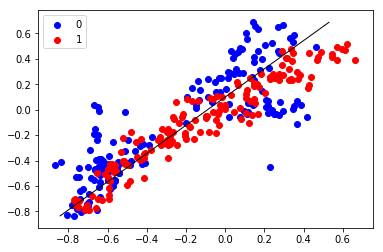

In [18]:
plt.figure(figsize=(10, 6))
fig = plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
fig.savefig('RIAZ AHMED PHD(CS) - model.jpeg') 

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(C=1e20)

In [21]:
%time model.fit(X, y)

Wall time: 15.6 ms


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
preds = model.predict(X)
(preds == y).mean()

0.6910828025477707

In [23]:
p=model.predict([[-0.6337665714285716,-0.38503325714285713]])
print(p)

[0.]


In [24]:
model.intercept_, model.coef_

(array([0.31237512]), array([[ 3.48054597, -3.13580324]]))

# References
### [Web Link]
http://wnlab.isti.cnr.it/paolo/index.php/dataset/6rooms

### [1]
D. Bacciu, P. Barsocchi, S. Chessa, C. Gallicchio, and A. Micheli, 'An experimental characterization of reservoir computing in ambient assisted living applications', Neural Computing and Applications, Springer-Verlag, vol. 24 (6), pp. 1451-1464, [Web Link], ISSN 0941-0643, 2014